# climate extremes explorer (ODPS)

## 1 Login ODPS

In [1]:
from sql2odps import *
from odps import ODPS

# 1. create a odps instance,init_ODPS() return a odps instance
project= ''
ak=''
sk=''
endpoint=''
o = ODPS(ak,sk,project,endpoint=endpoint)
now_time = time.time()
print('time: ', time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(now_time)))

time:  2023-07-31 07:41:04


### 1.1 get a glimpse of all the tables in the project

In [2]:
show_all_tables(o)

start time:  2023-07-30 19:25:31
cesm
cesm_2006_2015
cesm_ass1
cesm_ass1_0726
cesm_ass1_0727
cesm_ass1_0728
cesm_ass1_0730
cesm_ass1_100year_0730
cesm_ass1_50year_0728
cesm_ass1_50year_0728_1
cesm_ass1_50year_0729
cesm_ass2_0726
cesm_city
cesm_future
cesm_output
cesm_output1
cesm_output_2016
cesm_prect
cesm_trefhtmx
hongwei_testsql
mean_of_cesm_city
mean_of_cesm_output
mean_of_cesm_output1
odps_test
output_test
output_test_test
temp_table
testsql
testsql2
tmp_pyodps_5904a6d3_f8df_43ee_8b0d_d5870133d52b
tmp_pyodps_781df8c3_806e_4e1d_ba1d_8b2027851700
tmp_pyodps_f228b79d_5a6d_4144_b2d3_caa1e8259093
trefhtmx_2006_2015


### 1.2 show the schema of a table

In [3]:
# 2. get table info,get_table_info() show the schema of the table_name ,return a table object
# for table in o.list_tables():
#     print(table.name)
t = show_get_table_info(o, table_name='cesm')

start time:  2023-07-29 21:47:57
--------------------------------------------------
odps.Table
  name: cesm0511.`cesm`
  schema:
    member_id           : bigint            
    time                : timestamp         
    lat                 : double            
    lon                 : double            
    trefmxav_u          : double            
    flns                : double            
    fsns                : double            
    precsc              : double            
    precsl              : double            
    prect               : double            
    qbot                : double            
    trefht              : double            
    ubot                : double            
    vbot                : double            

size: 2565541639325
--------------------------------------------------


###  1.3 show the instances info

In [3]:
# 3. show the instance statues,prints the number of instances in each status

show_instance_statues(o,need_stop=True)
#show_instance_statues(o)

20230730032439836gyx1f354    Status.RUNNING
20230730032439969garix654    Status.RUNNING
20230730032440152gbrix654    Status.RUNNING
20230730032440229g0y1f354    Status.RUNNING
20230730032440376g1y1f354    Status.RUNNING
20230730032440452g2y1f354    Status.RUNNING
20230730032440629gdrix654    Status.RUNNING
2023073003244068gzx1f354    Status.RUNNING
--------------------------------------------------
time:  2023-07-30 19:25:41

--------------------------------------------------
time:  2023-07-30 19:25:41
total instance num:  27593
terminate instance num:  27585
running instance num:  8


### show instance process

In [ ]:
plot_instance_dur(o,show_number = 30,all_num= 400 ,show_type = 'minute',label_interval= 1,condition=[(2023,7,26,12,20,0,0)],show_id=True)

In [ ]:
get_instance_dur(o,'20230726042836261g875f354')


## 2.create your new table and insert data

In [4]:
# get the default column names and partitions of the table,in case you want to change the column names or type
# columns,partitions = init_table_info()
# columns.del('time')
columns = [
        
        Column(name='lat', type='double', comment='latitude, unit: degree'),
        Column(name='lon', type='double', comment='longitudue,unit: degree'),
        Column(name='time_list', type='TIMESTAMP', comment='date'),
        Column(name='climate_index', type='double', comment='index of cliamte (e.g., temperature, precipitation), unit: (e.g.,C, M/S)'),
        Column(name='quant', type='double', comment='quantile value of climate index at a specific percentile, unit: (e.g.,C, M/S)'),
        Column(name='frequence', type='int', comment='counts of the number cliamte extreme events in the seleacted peroid, unit: counts'),
        Column(name='mean_climate_index', type='double', comment='mean of the cliamte events in the seleacted peroid, unit: (e.g.,C, M/S)'),
        Column(name='group_id', type='double', comment=''),
        Column(name='single_event_dur', type='int', comment='single event duration, unit: days'),
        Column(name='total_duration', type='int', comment='total duration of climate extreme events in the seleacted peroid, unit: days'),
        #Column(name='percentile', type='int', comment='the percentile for calculating the quantile'),
        #Column(name='event_kind', type='string', comment='kind of climate extreme events'),
        ]
partitions = [
            #Partition(name='percentile_period', type='string', comment='the period of the quantile'), 
            Partition(name='percentile', type='int', comment='the percentile for calculating the quantile'),
            Partition(name='event_kind', type='string', comment='the partition'),
            Partition(name='member_id', type='int', comment='member id of cesm-lens1')]
columns,partitions 

([<column lat, type double>,
  <column lon, type double>,
  <column time_list, type timestamp>,
  <column climate_index, type double>,
  <column quant, type double>,
  <column frequence, type int>,
  <column mean_climate_index, type double>,
  <column group_id, type double>,
  <column single_event_dur, type int>,
  <column total_duration, type int>],
 [<partition percentile_period, type string>,
  <partition percentile, type int>,
  <partition event_kind, type string>,
  <partition member_id, type int>])

In [30]:
comment = 'This table stored the extremes of heatwaves and prep of cesm-lens1 06-100, try_2023_07_30,first is prect, second is trefhtmx'
create_table(o,table_name='cesm_ass1_50year_0730',columns=columns,partitions=partitions,
             comment=comment)

start time:  2023-07-30 07:29:22
table cesm_ass1_100year_0730 is created successfully!


In [31]:
# create a table with the table_name,columns and partitions
# create_table(o,table_name='cesm_ass1_0727',columns=columns,partitions=partitions)
t = show_get_table_info(o, table_name='cesm_ass1_50year_0730')

start time:  2023-07-30 07:29:24
--------------------------------------------------
odps.Table
  name: cesm0511.`cesm_ass1_100year_0730`
  schema:
    lat                                 : double            # latitude, unit: degree
    lon                                 : double            # longitudue,unit: degree
    time_list                           : timestamp         # date
    climate_index                       : double            # index of cliamte (e.g., temperature, precipitation), unit: (e.g.,C, M/S)
    quant                               : double            # quantile value of climate index at a specific percentile, unit: (e.g.,C, M/S)
    frequence                           : int               # counts of the number cliamte extreme events in the seleacted peroid, unit: counts
    mean_climate_index                  : double            # mean of the cliamte events in the seleacted peroid, unit: (e.g.,C, M/S)
    group_id                            : double            
 

### dorp table

In [7]:
# drop a table with the table_name input 
drop_table(o, table_name='cesm_ass1_100year_0730')

table info: 
start time:  2023-07-30 06:31:23
--------------------------------------------------
odps.Table
  name: cesm0511.`cesm_ass1_100year_0730`
  schema:
    lat                                 : double            # latitude, unit: degree
    lon                                 : double            # longitudue,unit: degree
    time_list                           : timestamp         # date
    climate_index                       : double            # index of cliamte (e.g., temperature, precipitation), unit: (e.g.,C, M/S)
    quant                               : double            # quantile value of climate index at a specific percentile, unit: (e.g.,C, M/S)
    frequence                           : int               # counts of the number cliamte extreme events in the seleacted peroid, unit: counts
    mean_climate_index                  : double            # mean of the cliamte events in the seleacted peroid, unit: (e.g.,C, M/S)
    group_id                            : double 


table cesm_ass1_100year_0730 is dropped successfully!


## 3 Select or insert information from table with config.josn

### 3.1 read the cofig file

In [5]:
# get the config info from the config.json file
get_config('config.json')

var_col_name      : ['prect', 'trefhtmx']         drop_nan          : FALSE                         select_positive   : TRUE                          
lat_col_name      : lat                           lon_col_name      : lon                           time_col_name     : time                          
start_year        : 2006                          end_year          : 2055                          start_month       : 1                             
end_month         : 12                            SELECT_ALL_TIME   : FALSE                         set_quantile      : NULL                          
quant             : 0.98                          duration_threshold: 3                             member_id         : 1                             
SQL_path          : ./sql/ass1_allmember.sql      output_filename   : intermediate_output.txt       tablename         : cesm_trefhtmx                 
output_table      : cesm_ass1_0730                

{'var_col_name': ['prect', 'trefhtmx'],
 'drop_nan': 'FALSE',
 'select_positive': 'TRUE',
 'lat_col_name': 'lat',
 'lon_col_name': 'lon',
 'time_col_name': 'time',
 'start_year': '2006',
 'end_year': '2055',
 'start_month': '1',
 'end_month': '12',
 'SELECT_ALL_TIME': 'FALSE',
 'set_quantile': 'NULL',
 'quant': '0.98',
 'duration_threshold': '3',
 'member_id': '1',
 'SQL_path': './sql/ass1_allmember.sql',
 'output_filename': 'intermediate_output.txt',
 'tablename': 'cesm_trefhtmx',
 'output_table': 'cesm_ass1_0730'}

**it's worth mentioning sth in the config.json file:**

quant and member_id are both can be list or just a number, but the format of the list is different.

but when they are list, **the elements in the list should be the same type**, and **shouldn't be str**,be int or float/double.

here is the example:

'quant': [0.8, 0.91, 0.05] or 'quant': 0.8
'member_id': [[1, 35, 1], [101, 105, 1]], or 'member_id': [1, 35, 1],or 'member_id': 'NULL'

### 3.2 execute SQL script in the ODPS

when run the odps_exec function, it will **show the config of 
what you have set in the config.json file.**

1. you need to check if the config is correct.if not ,you can input no and 
reset the config.

2. if the config is correct, you can input yes and run the sql2odps function.

3. if you want to quit the function, you can input quit/Q .


here's an example:

In [33]:
# if you want to manually check the config info,use the following code:
odps_exec()


--------------------------------------------------
var_col_name      : ['prect', 'trefhtmx']         drop_nan          : FALSE                         select_positive   : TRUE                          
lat_col_name      : lat                           lon_col_name      : lon                           time_col_name     : time                          
start_year        : 2006                          end_year          : 2055                          start_month       : 1                             
end_month         : 12                            SELECT_ALL_TIME   : TRUE                          set_quantile      : NULL                          
quant             : 0.98                          duration_threshold: 3                             member_id         : [[1, 36, 1], [101, 106, 1]]   
SQL_path          : ./sql/ass1.sql                output_filename   : intermediate_output.txt       tablename         : cesm_trefhtmx                 
output_table      : cesm_ass1_100year_0730

Processing member: 1:   2%|▎         | 1/40 [00:00<00:06,  5.90it/s]

--------------------------------------------------
member_id:  1 percentile:  0.98 var:  prect
--------------------------------------------------
--------------------------------------------------
member_id:  1 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 2:   2%|▎         | 1/40 [00:00<00:06,  5.90it/s]

--------------------------------------------------
member_id:  2 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 2:   5%|▌         | 2/40 [00:00<00:06,  5.94it/s]

--------------------------------------------------
member_id:  2 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 3:   5%|▌         | 2/40 [00:00<00:06,  5.94it/s]

--------------------------------------------------
member_id:  3 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 3:   5%|▌         | 2/40 [00:00<00:06,  5.94it/s]

--------------------------------------------------
member_id:  3 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 4:   8%|▊         | 3/40 [00:00<00:06,  5.82it/s]

--------------------------------------------------
member_id:  4 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 4:   8%|▊         | 3/40 [00:00<00:06,  5.82it/s]

--------------------------------------------------
member_id:  4 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 5:  10%|█         | 4/40 [00:00<00:05,  6.14it/s]

--------------------------------------------------
member_id:  5 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 5:  10%|█         | 4/40 [00:00<00:05,  6.14it/s]

--------------------------------------------------
member_id:  5 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 6:  12%|█▎        | 5/40 [00:00<00:05,  6.40it/s]

--------------------------------------------------
member_id:  6 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 6:  12%|█▎        | 5/40 [00:00<00:05,  6.40it/s]

--------------------------------------------------
member_id:  6 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 7:  15%|█▌        | 6/40 [00:00<00:05,  6.56it/s]

--------------------------------------------------
member_id:  7 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 7:  15%|█▌        | 6/40 [00:01<00:05,  6.56it/s]

--------------------------------------------------
member_id:  7 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 8:  18%|█▊        | 7/40 [00:01<00:04,  6.63it/s]

--------------------------------------------------
member_id:  8 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 8:  18%|█▊        | 7/40 [00:01<00:04,  6.63it/s]

--------------------------------------------------
member_id:  8 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 9:  20%|██        | 8/40 [00:01<00:04,  6.82it/s]

--------------------------------------------------
member_id:  9 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 9:  20%|██        | 8/40 [00:01<00:04,  6.82it/s]

--------------------------------------------------
member_id:  9 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 10:  22%|██▎       | 9/40 [00:01<00:04,  6.41it/s]

--------------------------------------------------
member_id:  10 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 10:  22%|██▎       | 9/40 [00:01<00:04,  6.41it/s]

--------------------------------------------------
member_id:  10 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 11:  25%|██▌       | 10/40 [00:01<00:04,  6.38it/s]

--------------------------------------------------
member_id:  11 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 11:  25%|██▌       | 10/40 [00:01<00:04,  6.38it/s]

--------------------------------------------------
member_id:  11 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 12:  28%|██▊       | 11/40 [00:01<00:04,  6.51it/s]

--------------------------------------------------
member_id:  12 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 12:  28%|██▊       | 11/40 [00:01<00:04,  6.51it/s]

--------------------------------------------------
member_id:  12 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 13:  30%|███       | 12/40 [00:01<00:04,  6.53it/s]

--------------------------------------------------
member_id:  13 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 13:  30%|███       | 12/40 [00:01<00:04,  6.53it/s]

--------------------------------------------------
member_id:  13 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 14:  32%|███▎      | 13/40 [00:02<00:04,  6.60it/s]

--------------------------------------------------
member_id:  14 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 14:  32%|███▎      | 13/40 [00:02<00:04,  6.60it/s]

--------------------------------------------------
member_id:  14 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 15:  35%|███▌      | 14/40 [00:02<00:03,  6.55it/s]

--------------------------------------------------
member_id:  15 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 15:  35%|███▌      | 14/40 [00:02<00:03,  6.55it/s]

--------------------------------------------------
member_id:  15 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 16:  38%|███▊      | 15/40 [00:02<00:03,  6.69it/s]

--------------------------------------------------
member_id:  16 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 16:  38%|███▊      | 15/40 [00:02<00:03,  6.69it/s]

--------------------------------------------------
member_id:  16 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 17:  40%|████      | 16/40 [00:02<00:03,  6.70it/s]

--------------------------------------------------
member_id:  17 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 17:  40%|████      | 16/40 [00:02<00:03,  6.70it/s]

--------------------------------------------------
member_id:  17 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 18:  42%|████▎     | 17/40 [00:02<00:03,  6.35it/s]

--------------------------------------------------
member_id:  18 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 18:  42%|████▎     | 17/40 [00:02<00:03,  6.35it/s]

--------------------------------------------------
member_id:  18 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 19:  45%|████▌     | 18/40 [00:02<00:03,  6.41it/s]

--------------------------------------------------
member_id:  19 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 19:  45%|████▌     | 18/40 [00:02<00:03,  6.41it/s]

--------------------------------------------------
member_id:  19 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 20:  48%|████▊     | 19/40 [00:02<00:03,  6.32it/s]

--------------------------------------------------
member_id:  20 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 20:  48%|████▊     | 19/40 [00:03<00:03,  6.32it/s]

--------------------------------------------------
member_id:  20 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 21:  50%|█████     | 20/40 [00:03<00:03,  5.88it/s]

--------------------------------------------------
member_id:  21 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 21:  50%|█████     | 20/40 [00:03<00:03,  5.88it/s]

--------------------------------------------------
member_id:  21 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 22:  52%|█████▎    | 21/40 [00:03<00:03,  6.08it/s]

--------------------------------------------------
member_id:  22 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 22:  52%|█████▎    | 21/40 [00:03<00:03,  6.08it/s]

--------------------------------------------------
member_id:  22 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 23:  55%|█████▌    | 22/40 [00:03<00:02,  6.23it/s]

--------------------------------------------------
member_id:  23 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 23:  55%|█████▌    | 22/40 [00:03<00:02,  6.23it/s]

--------------------------------------------------
member_id:  23 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 24:  57%|█████▊    | 23/40 [00:03<00:02,  6.43it/s]

--------------------------------------------------
member_id:  24 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 24:  57%|█████▊    | 23/40 [00:03<00:02,  6.43it/s]

--------------------------------------------------
member_id:  24 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 25:  60%|██████    | 24/40 [00:03<00:02,  6.50it/s]

--------------------------------------------------
member_id:  25 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 25:  60%|██████    | 24/40 [00:03<00:02,  6.50it/s]

--------------------------------------------------
member_id:  25 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 26:  62%|██████▎   | 25/40 [00:03<00:02,  6.31it/s]

--------------------------------------------------
member_id:  26 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 26:  62%|██████▎   | 25/40 [00:03<00:02,  6.31it/s]

--------------------------------------------------
member_id:  26 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 27:  65%|██████▌   | 26/40 [00:04<00:02,  6.47it/s]

--------------------------------------------------
member_id:  27 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 27:  65%|██████▌   | 26/40 [00:04<00:02,  6.47it/s]

--------------------------------------------------
member_id:  27 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 28:  68%|██████▊   | 27/40 [00:04<00:02,  6.46it/s]

--------------------------------------------------
member_id:  28 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 28:  68%|██████▊   | 27/40 [00:04<00:02,  6.46it/s]

--------------------------------------------------
member_id:  28 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 29:  70%|███████   | 28/40 [00:04<00:01,  6.52it/s]

--------------------------------------------------
member_id:  29 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 29:  70%|███████   | 28/40 [00:04<00:01,  6.52it/s]

--------------------------------------------------
member_id:  29 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 30:  72%|███████▎  | 29/40 [00:04<00:01,  6.62it/s]

--------------------------------------------------
member_id:  30 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 30:  72%|███████▎  | 29/40 [00:04<00:01,  6.62it/s]

--------------------------------------------------
member_id:  30 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 31:  75%|███████▌  | 30/40 [00:04<00:01,  6.67it/s]

--------------------------------------------------
member_id:  31 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 31:  75%|███████▌  | 30/40 [00:04<00:01,  6.67it/s]

--------------------------------------------------
member_id:  31 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 32:  78%|███████▊  | 31/40 [00:04<00:01,  6.27it/s]

--------------------------------------------------
member_id:  32 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 32:  78%|███████▊  | 31/40 [00:04<00:01,  6.27it/s]

--------------------------------------------------
member_id:  32 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 33:  80%|████████  | 32/40 [00:04<00:01,  6.42it/s]

--------------------------------------------------
member_id:  33 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 33:  80%|████████  | 32/40 [00:05<00:01,  6.42it/s]

--------------------------------------------------
member_id:  33 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 34:  82%|████████▎ | 33/40 [00:05<00:01,  6.56it/s]

--------------------------------------------------
member_id:  34 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 34:  82%|████████▎ | 33/40 [00:05<00:01,  6.56it/s]

--------------------------------------------------
member_id:  34 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 35:  85%|████████▌ | 34/40 [00:05<00:00,  6.64it/s]

--------------------------------------------------
member_id:  35 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 35:  85%|████████▌ | 34/40 [00:05<00:00,  6.64it/s]

--------------------------------------------------
member_id:  35 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 101:  88%|████████▊ | 35/40 [00:05<00:00,  6.68it/s]

--------------------------------------------------
member_id:  101 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 101:  88%|████████▊ | 35/40 [00:05<00:00,  6.68it/s]

--------------------------------------------------
member_id:  101 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 102:  90%|█████████ | 36/40 [00:05<00:00,  6.57it/s]

--------------------------------------------------
member_id:  102 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 102:  90%|█████████ | 36/40 [00:05<00:00,  6.57it/s]

--------------------------------------------------
member_id:  102 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 103:  92%|█████████▎| 37/40 [00:05<00:00,  6.38it/s]

--------------------------------------------------
member_id:  103 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 103:  92%|█████████▎| 37/40 [00:05<00:00,  6.38it/s]

--------------------------------------------------
member_id:  103 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 104:  95%|█████████▌| 38/40 [00:05<00:00,  6.42it/s]

--------------------------------------------------
member_id:  104 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 104:  95%|█████████▌| 38/40 [00:05<00:00,  6.42it/s]

--------------------------------------------------
member_id:  104 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 105:  98%|█████████▊| 39/40 [00:06<00:00,  6.50it/s]

--------------------------------------------------
member_id:  105 percentile:  0.98 var:  prect
--------------------------------------------------


Processing member: 105:  98%|█████████▊| 39/40 [00:06<00:00,  6.50it/s]

--------------------------------------------------
member_id:  105 percentile:  0.98 var:  trefhtmx
--------------------------------------------------


Processing member: 105: 100%|██████████| 40/40 [00:06<00:00,  6.43it/s]


---------------Finish to execute the 2nd sql script!---------------
end time:  2023-07-30 07:29:41

--------------------------------------------------
var_col_name      : ['prect', 'trefhtmx']         drop_nan          : FALSE                         select_positive   : TRUE                          
lat_col_name      : lat                           lon_col_name      : lon                           time_col_name     : time                          
start_year        : 2006                          end_year          : 2055                          start_month       : 1                             
end_month         : 12                            SELECT_ALL_TIME   : TRUE                          set_quantile      : NULL                          
quant             : 0.98                          duration_threshold: 3                             member_id         : [[1, 36, 1], [101, 106, 1]]   
SQL_path          : ./sql/ass1.sql                output_filename   : intermediate_output.txt 

## test code 

In [4]:
%load_ext odps

The odps extension is already loaded. To reload it, use:
  %reload_ext odps


In [ ]:
%%sql

WITH T0 AS (
SELECT 
	trefhtmx climate_index,
	lat lat,
	lon lon,
	time time_list
	
FROM

	cesm_trefhtmx 

WHERE 
	(
			(
			1 = 1 OR 
				(
			YEAR(time) >= 2006 AND
			YEAR(time) <= 2015 AND
			MONTH(time) >= 1 AND
			MONTH(time) <= 12
				)
			)
			
 			
			
		AND
				( member_id = 105 )
		AND 	
				(0 = 0 OR trefhtmx IS NOT NULL)
		AND 	
				(0 = 0 OR trefhtmx > 0)
	)
)
,


T1 AS
(
SELECT 
	lon,
	lat,
	time_list,
	
	climate_index,
	
	(
		CASE 
			WHEN 
				NULL IS NULL
			THEN
				
				percentile_approx(T0.climate_index,0.9900000000000001) OVER (PARTITION BY lon, lat)
			ELSE
				NULL 
		END
	)AS quant
FROM 
	T0
),


T2 AS (
SELECT 
	lon, 
	lat,
	time_list,
	climate_index,
	quant,
	(CASE 
		WHEN quant <= T1.climate_index 
		THEN  1 
	ELSE 0 END) AS HW
FROM 
	T1),


T3 AS (

SELECT 
	lon, 
    lat,
    time_list,
    climate_index,
    quant,
    HW,
    ROW_NUMBER() OVER ( ORDER BY lat,lon,time_list) AS row_num
FROM
	T2
WHERE 
	HW = 1
),


T3_SHIFT AS (
    SELECT 
        lon, 
        lat,
        time_list,
        climate_index,
        quant,
        HW,
        (
            CASE 
                WHEN DATEDIFF(time_list, LAG(time_list, 1) OVER (ORDER BY row_num),'dd') = 1 
                    AND lat = LAG(lat, 1) OVER (ORDER BY row_num) 
                    AND lon = LAG(lon, 1) OVER (ORDER BY row_num)
                THEN 0
                ELSE 1
            END
        ) AS diff,
		row_num
    FROM T3
),

 T_fina_0 AS(
 SELECT
	lon,
 	lat,
 	time_list,
 	climate_index,
 	quant,
 	HW,
	diff,
	COUNT(group_id) OVER(PARTITION BY group_id  ORDER BY group_id) duration,
	group_id,
	row_num
 FROM 
	 (
	 SELECT 
 		lon,
 		lat,
 		time_list,
 		climate_index,
 		quant,
 		HW,
		diff,
 		
 		SUM(diff) OVER (ORDER BY row_num) AS group_id,
 		row_num
	 FROM
 		T3_SHIFT
	)T_temp
	
 ),

  T_final AS(
 SELECT
	lon,
 	lat,
 	time_list,
 	climate_index,
 	quant,
 	HW,
	diff,
	COUNT(group_id) OVER(PARTITION BY group_id  ORDER BY group_id) duration,
	group_id,
	row_num
 FROM 
	T_fina_0 
where 
	duration>=3
	
 ),

 
freq_col AS
(
SELECT
	lat,
	lon,
	COUNT(DISTINCT group_id)	feq 
FROM
	T_final FT
GROUP BY
	FT.lat ,FT.lon
),


dura_col AS
(
SELECT
	 DISTINCT lat, lon, total_dur	
 
FROM
(
	SELECT
		lat,
		lon,
		SUM(avg_d) OVER(PARTITION BY lat,lon) total_dur 
	FROM	
	(
		SELECT 
			lat,
			lon,
			AVG(duration) avg_d
		FROM
			T_final FT
		GROUP BY
			FT.lat,FT.lon,group_id
	)T_1
)T_2	
),


intens_col AS(
SELECT 
	lat,
	lon,
	AVG(FT.climate_index) mean_tmp
FROM
	T_final FT
GROUP BY
	lat,
	lon
),

Metrics_col AS(
SELECT
	T_t.frequence,
	ic.mean_tmp mean_t,
	T_t.total_duration,
	T_t.lat,
	T_t.lon
FROM
(
	SELECT
		fc.feq frequence,
		dc.total_dur total_duration,
		fc.lat lat,
		fc.lon lon
	FROM
		freq_col fc,dura_col dc
	WHERE 
		fc.lat = dc.lat AND
		fc.lon = dc.lon
	)T_t,intens_col ic
WHERE
	T_t.lat = ic.lat AND
	T_t.lon = ic.lon
),


result AS(
SELECT
	ft.lat,
	ft.lon,
	ft.time_list,
	ft.climate_index climate_index,
	ft.quant quant,
	mc.frequence,
	mc.mean_t mean_t, 
	ft.group_id,
	ft.duration single_event_dur,
	mc.total_duration total_duration,	
	ft.row_num

FROM
	Metrics_col mc,T_final ft
WHERE
	ft.lat = mc.lat AND ft.lon = mc.lon
)



INSERT INTO TABLE cesm_ass1_0727 partition(percentile=99, member_id=105, event_kind = 'trefhtmx')
SELECT * except(row_num)
	
	
FROM result

ORDER BY 
		lat,
		lon,
 		time_list;


## 计算消耗时间

In [18]:
from odps.models import Instance
import matplotlib.pyplot as plt
import datetime
import time

def plot_eltime(start_time,end_time):
    now_time = time.time()
    print('time: ', time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(now_time)))
    project= ''
    ak=''
    sk=''
    endpoint=''
    o = ODPS(ak,sk,project,endpoint=endpoint)

    i = 0

    ttime =[]
    cpu_cost =[]
    memory_cost=[]
    print('num | id | start time | end_time |  task time | cpu_cost | memory_cost')


    for instance in o.list_instances(start_time=start_time,end_time=end_time):
        if instance.is_successful():
                cost = instance.get_task_detail(instance.get_task_names()[0])
                print(cost)
                print(str(i), instance.id, instance.start_time, 
                      instance.end_time, instance.end_time - instance.start_time,
                      #(instance.end_time - instance.start_time).total_seconds(),
                      #cost.cpu_cost,
                      ) 
                ttime.append((instance.end_time - instance.start_time).total_seconds())
                cpu_cost.append(instance.TaskCost.cpu_cost)
                memory_cost.append(instance.TaskCost.memory_cost)
                i += 1
                if i == 1:
                    timetotal = instance.start_time
                    timetotal2 = instance.end_time
                else:
                    if (instance.end_time-timetotal2).total_seconds()>0:
                        timetotal2 = instance.end_time
        else:
                print('failed')
                print(instance.id, instance.start_time, 
                    instance.end_time, instance.end_time - instance.start_time,
                    (instance.end_time - instance.start_time).total_seconds())        

    print('finshed taskes:', str(i))
    print('takes time: ', timetotal2 - timetotal)
    print('takes time (sum of',str(len(ttime)), ' instanes):',datetime.timedelta(seconds=sum(ttime)))
    print('takes time (min of',str(len(ttime)), ' instanes):',min(ttime))
    print('cpu_cost(sum):', sum(cpu_cost))
    print('mem_cost(sum):', sum(memory_cost))
    plt.figure(figsize=(8, 6))
    #plt.title('Density Plot')
    plt.xlabel('run time (s)')
    plt.ylabel('counts')
    plt.hist(ttime, alpha=0.5, color='steelblue',edgecolor='black')
    plt.show()


## 计算消耗时间--20230730
输出，cesm_ass1_100year_0730，分位数0.98，时间段06-100，40members

time:  2023-07-30 21:22:45
num | id | start time | end_time |  task time
0 20230729232935303gxe7f354 2023-07-30 07:29:35 2023-07-30 07:54:16 0:24:41 1481.0
1 20230729232935390gye7f354 2023-07-30 07:29:35 2023-07-30 07:47:24 0:17:49 1069.0


2 20230729232935487gjaox654 2023-07-30 07:29:35 2023-07-30 07:51:27 0:21:52 1312.0
3 20230729232935560gze7f354 2023-07-30 07:29:35 2023-07-30 07:49:17 0:19:42 1182.0
4 20230729232935638gkaox654 2023-07-30 07:29:35 2023-07-30 07:46:45 0:17:10 1030.0
5 20230729232935735g0f7f354 2023-07-30 07:29:35 2023-07-30 07:47:34 0:17:59 1079.0
6 20230729232935814glaox654 2023-07-30 07:29:35 2023-07-30 07:51:25 0:21:50 1310.0
7 20230729232935886g1f7f354 2023-07-30 07:29:35 2023-07-30 07:47:39 0:18:04 1084.0
8 20230729232935961g2f7f354 2023-07-30 07:29:36 2023-07-30 07:44:38 0:15:02 902.0
9 20230729232936105gnaox654 2023-07-30 07:29:36 2023-07-30 07:50:48 0:21:12 1272.0
10 20230729232936172goaox654 2023-07-30 07:29:36 2023-07-30 07:49:33 0:19:57 1197.0
11 20230729232936252g3f7f354 2023-07-30 07:29:36 2023-07-30 07:49:09 0:19:33 1173.0
12 20230729232936321gpaox654 2023-07-30 07:29:36 2023-07-30 07:47:31 0:17:55 1075.0
13 2023072923293633gmaox654 2023-07-30 07:29:36 2023-07-30 07:50:04 0:20:28 1228.0
14

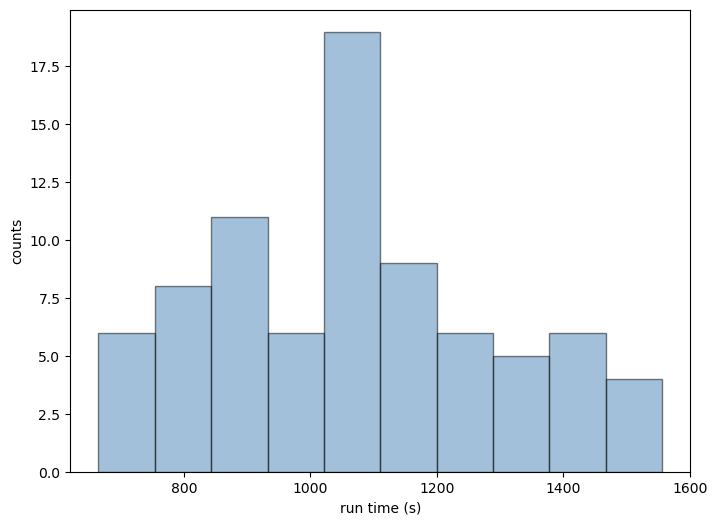

In [16]:
start_time=datetime.datetime(2023,7,30,7,29,35)
end_time=datetime.datetime(2023,7,30,7,31,59)
plot_eltime(start_time=start_time,end_time=end_time)